<a href="https://colab.research.google.com/github/SagarGuttal/Tomato-Leaf-Diseases-Detection-/blob/main/Tomato_Diseseas_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tomato Leaf Diseases Detection Using Deep Learning (Convolutional Neural Network)

Importing libraries and modules required for this project

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Images specifications like size and color channels for this project

In [ ]:
image_size = 256
batch_size = 32
channels = 3

Loading the image dataset directory from tensorflow library API's 

In [ ]:
import pathlib

path = "/content/drive/MyDrive/PROJECTS/Datasets/Potatoleaves"

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    shuffle = True,
    image_size = (image_size,image_size),
    batch_size = batch_size
)

Found 4568 files belonging to 3 classes.


* Our dataset contains 4568 images of 3 different classes and these images are loaded it into 32 images for each batch.
* Three classes are -> **'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy'**

In [ ]:
class_names = dataset.class_names
class_names

['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']

In [ ]:
length = int(len(dataset))
total_images = length*32
print(total_images)

4576


* Image size ----> 256,256,3
* Batch_size ----> 32

Iterating through first batch images and shape of each image and its labels

In [ ]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[2 2 0 0 2 0 0 1 2 0 1 1 0 1 1 1 0 1 0 0 2 1 2 2 2 1 2 1 2 2 1 1]


Lets see the first 12 images with diseases.

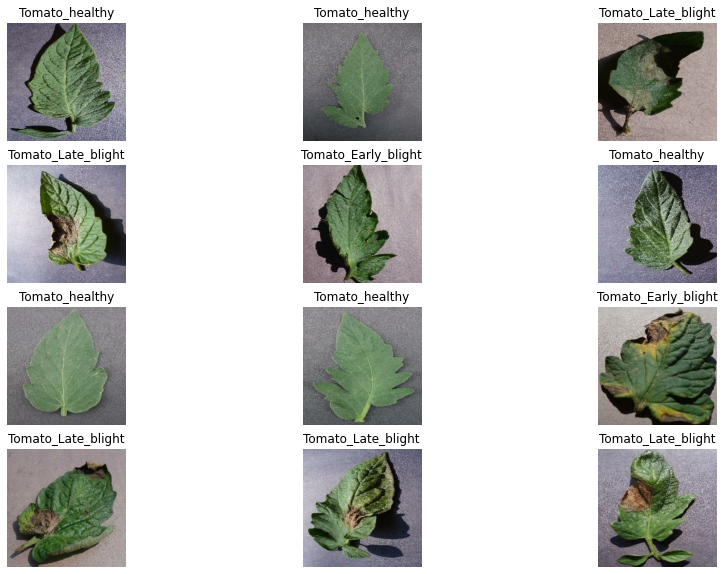

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
for image, label in dataset.take(1):
  for count in range(12):
    ax = plt.subplot(4,3,count+1)
    plt.imshow(image[count].numpy().astype("uint8"))
    plt.title(class_names[label[count]])
    plt.axis("off")
plt.show()

## Train Test Split
* 80 % of data set goes for training
* 10 % of data set goes for validation
* 10 % of dataset goes for testing our final model

In [ ]:
print("total size of data set in batches :-", len(dataset))
print("traing size of data set in batches  :-", len(dataset)*0.8)
print("validation size of data set in batches  :-", len(dataset)*0.1)
print("testing size of data set in batches  :-", len(dataset)*0.1)

total size of data set in batches :- 143
traing size of data set in batches  :- 114.4
validation size of data set in batches  :- 14.3
testing size of data set in batches  :- 14.3


1. Total 68 batches of datasets having total 2152
2. we take 54 batches of dataset for training
3. Ramaining dataset for testing and validation
    * we take 6 batches for validation
    * we take 6 bathces for final testing

In [ ]:
# Training dataset
train_ds = dataset.take(54)
len(train_ds)

54

In [ ]:
# Testing and valdition dataset
test_validation_ds = dataset.skip(54)
len(test_validation_ds)

89

In [ ]:
# validation dataset
val_ds = dataset.take(6)
len(val_ds)

6

In [ ]:
# testing dataset
test_ds = test_validation_ds.skip(6)
len(test_ds)

83

In [ ]:
for img, label in train_ds.take(1):
  print(img.numpy().shape)

(32, 256, 256, 3)


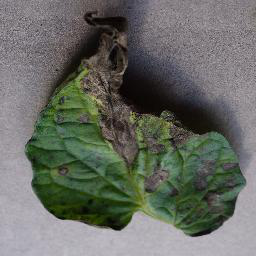

In [ ]:
img_path = "/content/drive/MyDrive/PROJECTS/Datasets/Potatoleaves/Tomato_Early_blight/0034a551-9512-44e5-ba6c-827f85ecc688___RS_Erly.B 9432.JPG"
img = PIL.Image.open(img_path)
img

In [ ]:
import cv2
img = cv2.imread(img_path)
img.shape

(256, 256, 3)

In [ ]:
img = cv2.resize(img,(180,180))

img.shape

(180, 180, 3)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

For using **data augmentation** technique for  improving model performance and reducing **Biasness** in model for real world scenarios.

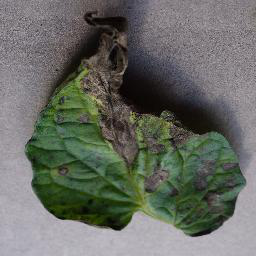

In [ ]:
# Original image
img = PIL.Image.open(img_path)
img

In [ ]:
augmentation_zoom_img = keras.Sequential([ 
  tf.keras.layers.RandomZoom(0.5)
])

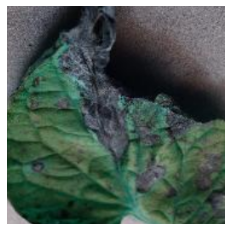

In [ ]:
# Random Zoom image
img = cv2.imread(img_path)
random_zoom = augmentation_zoom_img(img)
plt.imshow(random_zoom.numpy().astype("uint8"))
plt.axis("off")
plt.show()

In [ ]:
augmentation_constract_img = keras.Sequential([
    tf.keras.layers.RandomContrast(0.5)
])

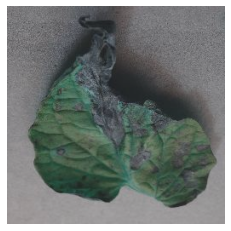

In [ ]:
#Random Constract image
img = cv2.imread(img_path)
random_constract = augmentation_constract_img(img)
plt.imshow(random_constract.numpy().astype("uint8"))
plt.axis("off")
plt.show()

In [ ]:
augmentation_rotation_img = keras.Sequential([
    tf.keras.layers.RandomRotation(0.5)
])

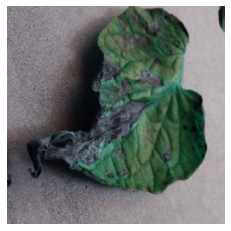

In [ ]:
img = cv2.imread(img_path)
random_rotation = augmentation_rotation_img(img)
plt.imshow(random_rotation.numpy().astype("uint8"))
plt.axis("off")
plt.show()

Function for data augmenatation processing it returns augmentated images

In [ ]:
def augmentation_image(imgage_path):
  augmentation_zoom_img = keras.Sequential([tf.keras.layers.RandomZoom(0.9)])
  augmentation_constract_img = keras.Sequential([tf.keras.layers.RandomContrast(0.9)])
  augmentation_rotation_img = keras.Sequential([tf.keras.layers.RandomRotation(0.5)])
  # augmentation_flip_img = keras.Sequential([tf.keras.layers.RandomFlip("horizontal",input_shape=(256,256,3))])

  img = cv2.imread(imgage_path)
  zoom_img = augmentation_zoom_img(img)
  constract_img = augmentation_constract_img(img)
  rotated_img = augmentation_rotation_img(img)
  # flip_img = augmentation_flip_img(img)
  aug_images={"Original image":img,"Zoom image":zoom_img,"Constract image":constract_img,"Rotated":rotated_img}

  return aug_images
  

Lets see how our augmented images are created and compare with original images

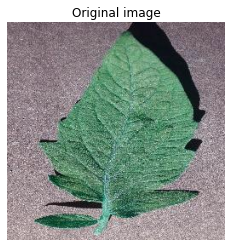

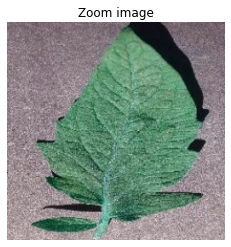

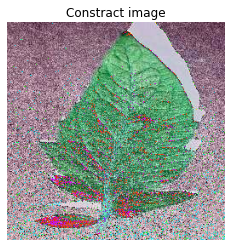

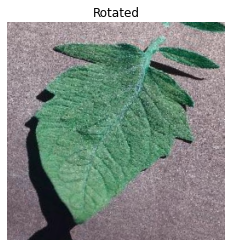

In [ ]:
path = "/content/drive/MyDrive/PROJECTS/Datasets/Potatoleaves/Tomato_healthy/003944fc-3b99-4a0f-9ed4-0e07352fd8b3___RS_HL 9844.JPG"
augmentated_images = augmentation_image(path)
augmentated_images

plt.title("Original image")
plt.axis("off")
plt.imshow(augmentated_images["Original image"])
plt.show()
for label, image in augmentated_images.items():
    if image.dtype != 'uint8':
      plt.axis("off")
      plt.imshow(image.numpy().astype("uint8"))
      plt.title(label)
    plt.show()

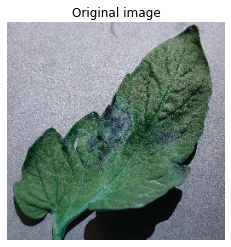

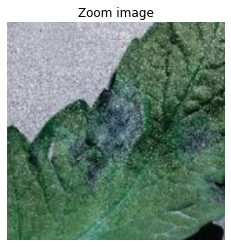

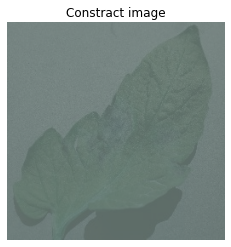

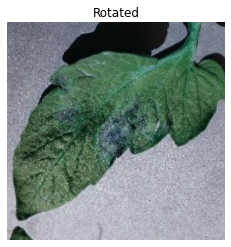

In [ ]:
path_1 ="/content/drive/MyDrive/PROJECTS/Datasets/Potatoleaves/Tomato_Late_blight/005e3b43-9050-47da-9498-f9ecdcc703b3___RS_Late.B 5104.JPG" 
augmentated_images = augmentation_image(path_1)
augmentated_images

plt.title("Original image")
plt.axis("off")
plt.imshow(augmentated_images["Original image"])
plt.show()
for label, image in augmentated_images.items():
    if image.dtype != 'uint8':
      plt.axis("off")
      plt.imshow(image.numpy().astype("uint8"))
      plt.title(label)
    plt.show()

# `**Creating a resize and rescaled layer for my final model**`

Resize and rescaled layer

In [ ]:
Resize_and_rescaled = tf.keras.Sequential([
    tf.keras.layers.Resizing(180,180),
    tf.keras.layers.Rescaling(1.0/255)
])

## Creating Convolution Neural Network Layer

In [ ]:
batch_size, image_size, channels  = 32,256,3 

input_shape = (batch_size,image_size,image_size,channels)
n_classes = 3

model_1 = Sequential([
    Resize_and_rescaled,
    layers.Conv2D(16, (3,3), padding = 'same', activation= 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(16, (3,3), padding = 'same', activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(16, (3,3), padding = 'same', activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Flatten(),

    layers.Dense(16, activation= 'relu'),
    layers.Dense(32, activation= 'relu'),
    layers.Dense(n_classes, activation= 'softmax')
])

model_1.build(input_shape = input_shape)

Summary of neural network and trainable parameters

In [ ]:
model1_history = model_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (32, 180, 180, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 180, 180, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 90, 90, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 90, 90, 16)          2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 45, 45, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 45, 45, 16)        

Compile the neural network with optimizer and metric

In [ ]:
model_1.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ["accuracy"]
)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,)

* Load the training images to train the neural network 
* Training images are loaded into batches of 32 images 
* calculating the losses of each iterations and updating the weights of each inputs using Adam opimizer

In [ ]:
model_history = model_1.fit(train_ds,epochs = 50, batch_size = batch_size, verbose = 1,
     validation_data = val_ds, callbacks = early_stopping)

Epoch 1/50
54/54 [==============================] - 420s 8s/step - loss: 0.9262 - accuracy: 0.6140 - val_loss: 0.5794 - val_accuracy: 0.7344
Epoch 2/50
54/54 [==============================] - 5s 90ms/step - loss: 0.4311 - accuracy: 0.8229 - val_loss: 0.2913 - val_accuracy: 0.8906
Epoch 3/50
54/54 [==============================] - 5s 89ms/step - loss: 0.2601 - accuracy: 0.8889 - val_loss: 0.2216 - val_accuracy: 0.9167
Epoch 4/50
54/54 [==============================] - 5s 91ms/step - loss: 0.2202 - accuracy: 0.9051 - val_loss: 0.3554 - val_accuracy: 0.8438
Epoch 5/50
54/54 [==============================] - 5s 90ms/step - loss: 0.2282 - accuracy: 0.9057 - val_loss: 0.1732 - val_accuracy: 0.9219
Epoch 6/50
54/54 [==============================] - 5s 90ms/step - loss: 0.1689 - accuracy: 0.9398 - val_loss: 0.1412 - val_accuracy: 0.9427
Epoch 7/50
54/54 [==============================] - 5s 88ms/step - loss: 0.1628 - accuracy: 0.9253 - val_loss: 0.1350 - val_accuracy: 0.9167
Epoch 8/50
54

* Accuracy of model 99.07 % in our training phase
* Accuracy o model 94.30 % in testing phase

In [ ]:
model_1.evaluate(test_ds)

83/83 [==============================] - 632s 7s/step - loss: 0.3003 - accuracy: 0.9430


[0.3002888262271881, 0.9429758191108704]

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Evaluate the model performance.
1. Ploting accuracy of model

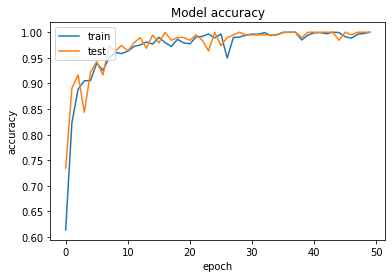

In [ ]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title('Model accuracy')
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper left')
plt.show()

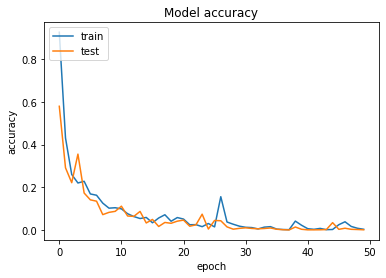

In [ ]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title('Model accuracy')
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Image to predict
Actual label: Tomato_healthy
predicted label: Tomato_healthy


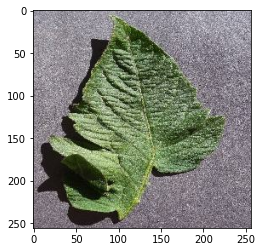

In [ ]:
for img_batch, label_batch in test_ds.take(1):

  image = img_batch[0].numpy().astype("uint8")
  label = label_batch[0].numpy()

  print("Image to predict")
  plt.imshow(image)
  print("Actual label:", class_names[label])

  batch_prediction = model_1.predict(img_batch)
  print("predicted label:",class_names[np.argmax(batch_prediction[0])])

Image :- 0


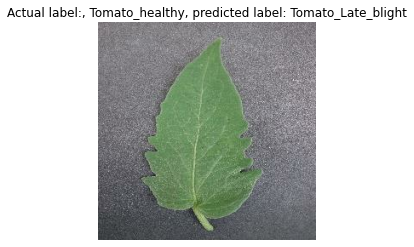

Image :- 1


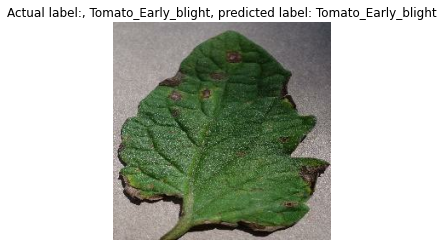

Image :- 2


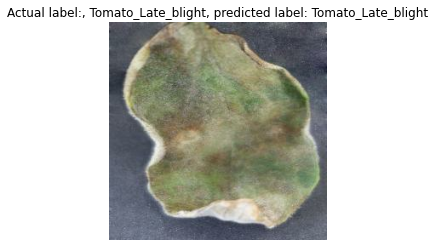

Image :- 3


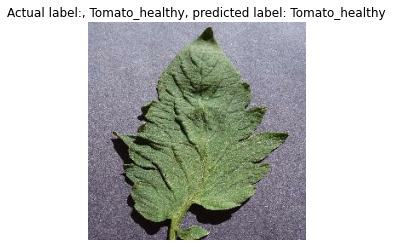

Image :- 4


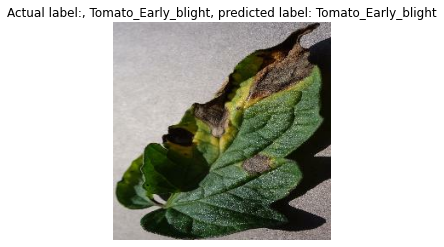

In [ ]:
for img_batch, label_batch in test_ds.take(1):
  for count in range(5):
    print("Image :-", count)
    image = img_batch[count].numpy().astype("uint8")
    label = label_batch[count].numpy()
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Actual label:, {class_names[label]}, predicted label: {class_names[np.argmax(batch_prediction[count])]}")
    batch_prediction = model_1.predict(img_batch)
    plt.show()

In [ ]:
def predict_diseas(model, img):
  img_array =  tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array, 0) #create a batch

  predictions = model_1.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])), 2)
  return predicted_class, confidence

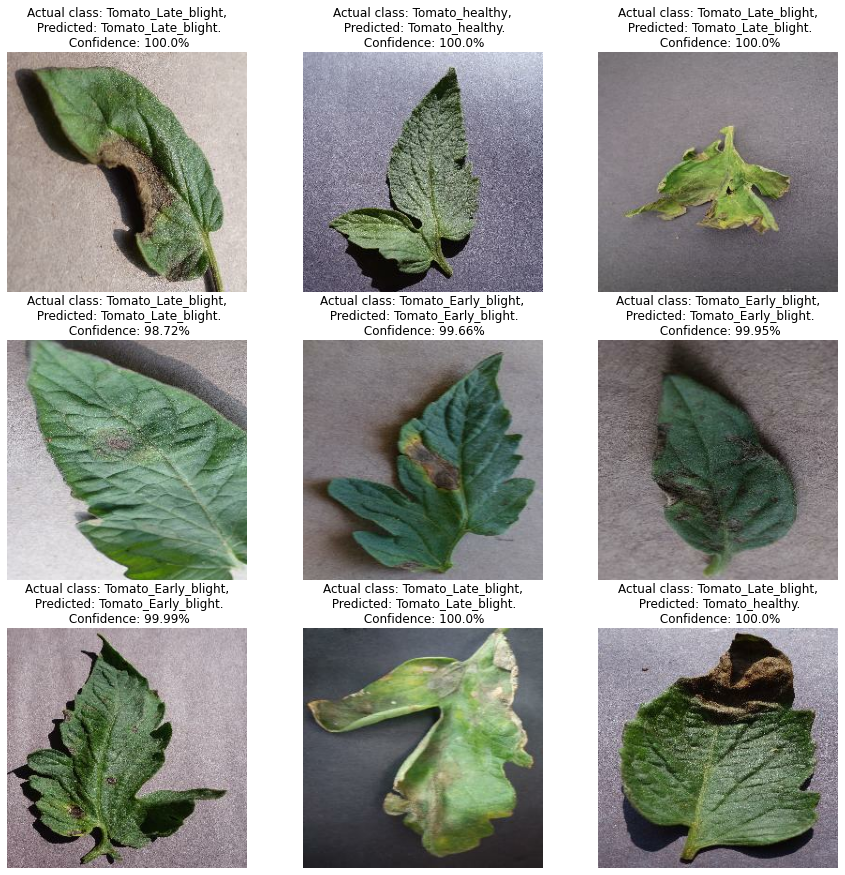

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))

    predicted_class, confidence = predict_diseas(model_1, images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f"Actual class: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
    plt.axis("off")